# Thống kê lương theo loại công ty, đưa ra nhận xét.

Để trả lời câu hỏi trên ta sẽ phân loại công ty công nghệ, ngân hàng, thực phẩm,...

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import warnings
import re 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Đọc dữ liệu từ file `data.csv`.

In [2]:
df = pd.read_csv('data.csv')
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
0,Business Analyst,Asilla Việt Nam,2023-01-31,"(1200, 1400)",5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Cầu Giấy,Hà Nội",NaN,- Collaborate with Product Manager to understa...
1,Android Developer,FPT Software,2023-04-30,NaN,5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Hà Nội,Cầu Giấy,Thạch Thất",NaN,"• Working in Global delivery team (US, China, ..."
2,Nhân Viên IT,Công ty CPXD&PTHT Tây Hồ,2023-01-30,NaN,1,Toàn thời gian,Nhân viên,Nam,0.0,"Vĩnh Phúc,TP Vĩnh Yên",NaN,Chịu trách nhiệm giám sát hoạt động pho...
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
4,Java Developer,CÔNG TY TNHH YOUMED VIỆT NAM,2023-01-31,NaN,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Hồ Chí Minh,Quận 10","Java,Message Queue,Back-End Web Development","Phát triển tính năng đặt khám, telemedicine, s..."


In [3]:
new_df = df.dropna()

In [4]:
def avg_Salary(salary):
    salary = salary.replace("(",'').replace(")",'').replace(" ",'')
    salary = salary.split(',')
    a = (float(salary[0])+float(salary[1]))/2
    return (float(salary[0])+float(salary[1]))/2

In [5]:
new_df["Salary"] = new_df["Salary"].apply(avg_Salary)

In [6]:
def TypeCopany(Company):
    Company =  Company.lower()
    tech = ["công nghệ", "cong nghe", "software", "microtec", "skynet", "phần mềm", "cntt", "tech",'soft','tin','cmc' ]
    dichvu = ["dich vu", "dịch vụ", "viễn thông", 'dv', 'media', 'giải trí', 'luxstay']
    thuongmai = ["thuong mai", "thương mại", 'fin', 'đầu tư', 'business','pay']
    for i in thuongmai:
        if i in Company:
            return "Thương mại"
    for i in dichvu:
        if i in Company:
            return "Dịch vụ"
    for i in tech:
        if i in Company:
            return "Công nghệ"
    return "Khác"

In [7]:
new_df["Type_Company"] = new_df["Company"].apply(TypeCopany)

In [8]:
new_df["Type_Company"].value_counts()

Khác          299
Công nghệ     232
Dịch vụ       103
Thương mại     47
Name: Type_Company, dtype: int64

In [9]:
def salary_quantity(type):
    Salary_ = (new_df[new_df['Type_Company']==type]['Salary']*new_df[new_df['Type_Company']==type]['Quantity']).sum()/new_df[new_df['Type_Company']==type]['Quantity'].sum()
    Quantity_ = new_df[new_df['Type_Company']==type]['Quantity'].sum()
    return [type, int(Salary_), Quantity_]

In [10]:
arr = []
Type_com = ["Thương mại","Dịch vụ","Công nghệ",'Khác']
for i in Type_com:
    arr.append(salary_quantity(i))

In [11]:
a = pd.DataFrame(arr, columns=["Type",'Salary', 'Quantity'])
a.set_index("Type", inplace=True)

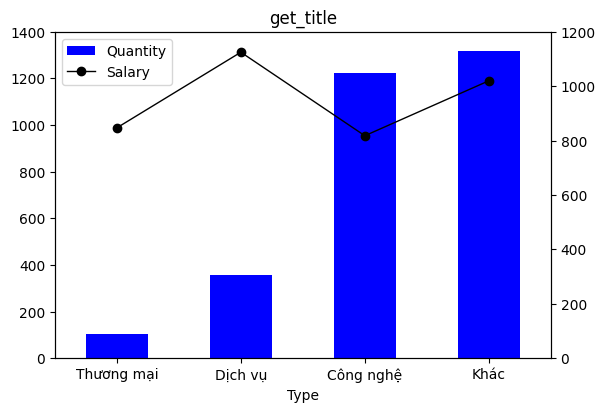

In [12]:
fig, ax = plt.subplots()

a['Quantity'].plot(kind='bar', stacked=False, title='get_title', 
                           color='blue', ax=ax, grid=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), a['Salary'], linestyle='-', marker='o', 
        color='k', linewidth=1.0, label='Salary')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.yaxis.set_ticks_position("left")
ax.set_ylim(0,1400)
ax2.yaxis.set_ticks_position("right")
ax2.set_ylim(0,1200)


fig.autofmt_xdate(rotation=0,ha='center')
plt.show()

- Mức lương công ty về mảng dịch vụ cao nhất

In [13]:
def draw_plot(df):
    Company_df = df[["Title","Salary","KinhNghiem"]]
    Company_df = Company_df.groupby(by='Title').mean().sort_values(by='Salary', ascending=False)
    Company_df = Company_df[:20]
    Company_df = Company_df.reset_index()

    sns.barplot(x=Company_df['Salary'], y=Company_df['Title'])
    plt.xlabel('Mức lương')

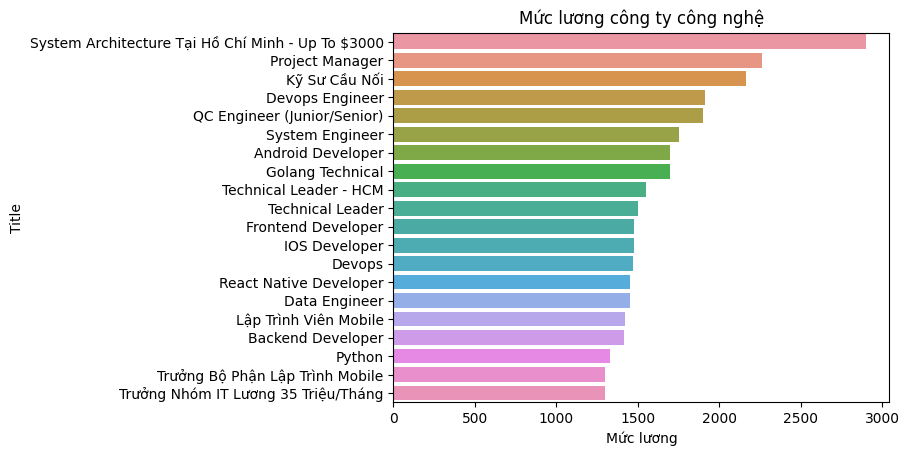

In [14]:
draw_plot(new_df[new_df["Type_Company"]=='Công nghệ'])
plt.title('Mức lương công ty công nghệ')
plt.show()

Mức lương các công ty về công nghệ
+ Mức lương cao nhất là 3000$/ tháng.
+ Các title có lương cao nhất là project manager, hoặc senior.

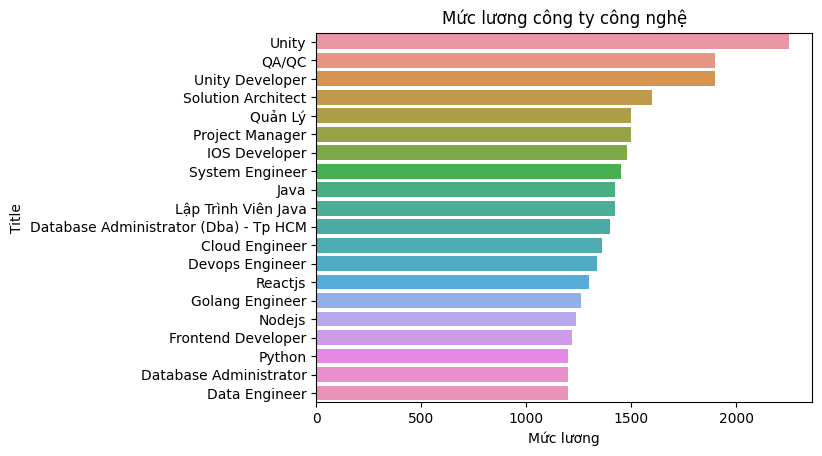

In [15]:
draw_plot(new_df[new_df["Type_Company"]=='Dịch vụ'])
plt.title('Mức lương công ty công nghệ')
plt.show()

Mức lương các công ty về dịch vụ
+ Mức lương cao nhất là 2000$/ tháng.
+ Các title có lương cao nhất là android, frontend,... Chủ yếu là về công nghệ phần mềm. 
+ Có thể thấy xu hướng của các công ty dịch vụ là kết hợp dịch vụ và công nghệ phần mềm.

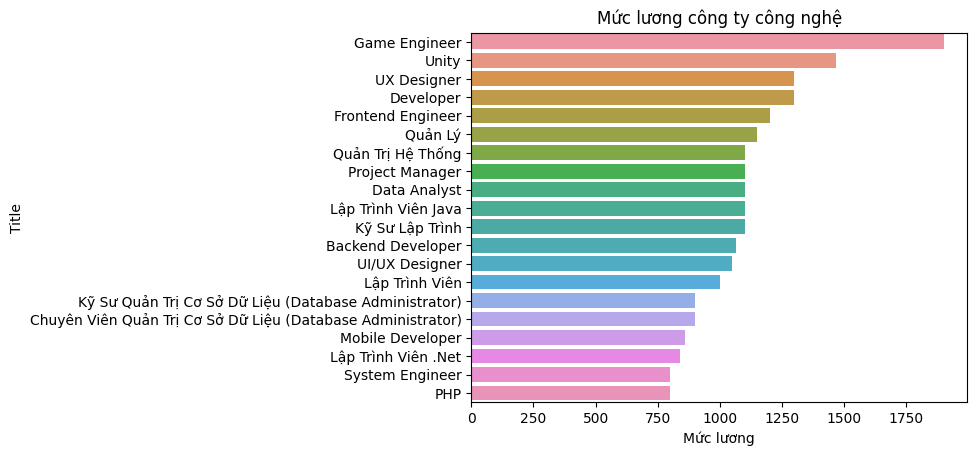

In [16]:
draw_plot(new_df[new_df["Type_Company"]=='Thương mại'])
plt.title('Mức lương công ty công nghệ')
plt.show()

Mức lương các công ty về thương mại
+ Mức lương cao nhất là khoảng 1600$/tháng.
+ Các title có lương cao nhất là data analyst, quản lý...
+ Có thể thấy công ty thương mại tập trung vào phân tích, xu hướng khách hàng,...

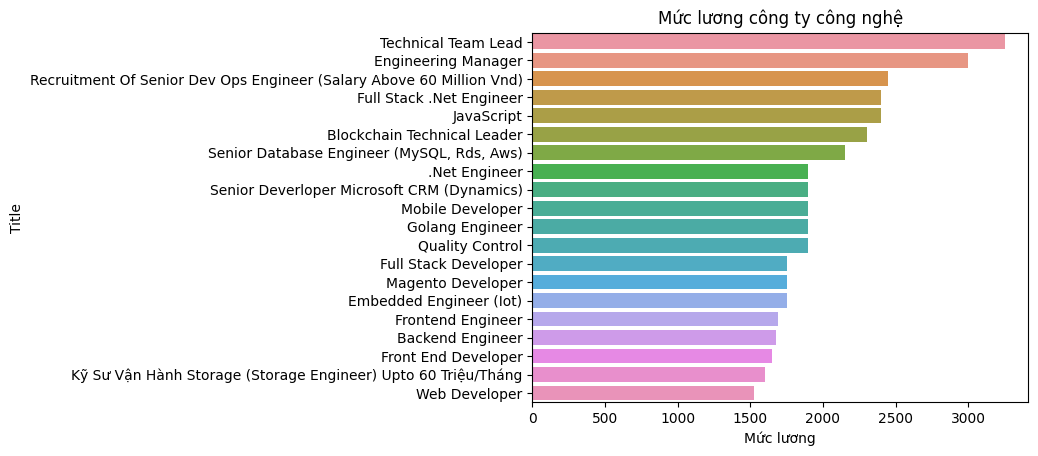

In [17]:
draw_plot(new_df[new_df["Type_Company"]=='Khác'])
plt.title('Mức lương công ty công nghệ')
plt.show()

Kết luận: 
- Với mỗi công ty về lĩnh vực khác nhau sẽ có nhu cầu về lập trình viên các mảng khác nhau.
- Tuy nhiên, mỗi ngành đều có xu hướng phát triển cùng với công nghệ thông tin trong tương lai.